<a href="https://colab.research.google.com/github/DIEGOCUM/SeminarioProfesional-Labs-16001350/blob/master/Lab1_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports data and print image array[0] 

In [1]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt


fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names2 = ['Man', 'Woman','Man', 'Woman','Man', 'Woman','Man', 'Woman','Woman', 'Woman']
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape



TensorFlow 2.x selected.
4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

# Imprimos una imagen para prueba


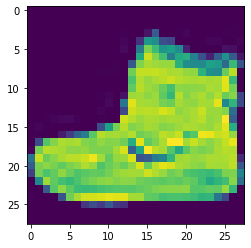

In [2]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

# El set de datos debe ser pre-procesada antes de entrenar la red

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Desplegamos la data para verificar que este en el formato que necesitamos


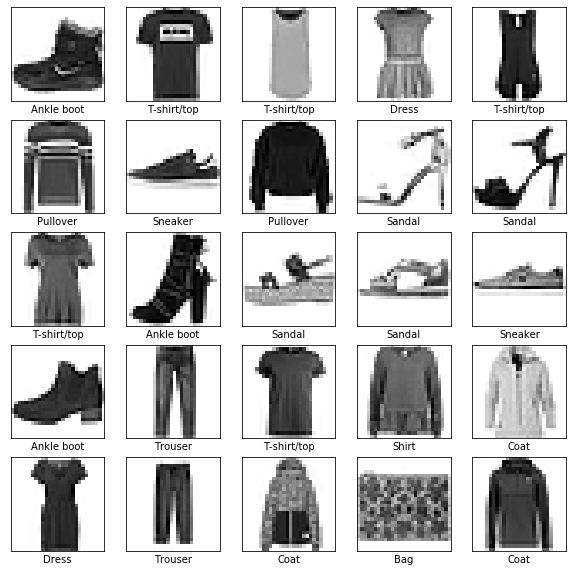

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construimos el modelo 


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') #sigmoid if binaru classification
])

##Compile model


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo


In [9]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4735 - accuracy: 0.8285
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3613 - accuracy: 0.8677
Epoch 3/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3244 - accuracy: 0.8802
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3006 - accuracy: 0.8877
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2828 - accuracy: 0.8942
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2671 - accuracy: 0.9000
Epoch 7/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2547 - accuracy: 0.9043
Epoch 8/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2456 - accuracy: 0.9067
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2336 - accuracy: 0.9112
Epoch 10/10
6

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3352 - accuracy: 0.8855

Test accuracy: 0.8855


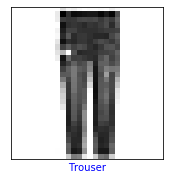

In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{}".format(class_names[predicted_label],),
                                color=color)

predictions = model.predict(test_images)  

i = 200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

# Ciclo de prueba 


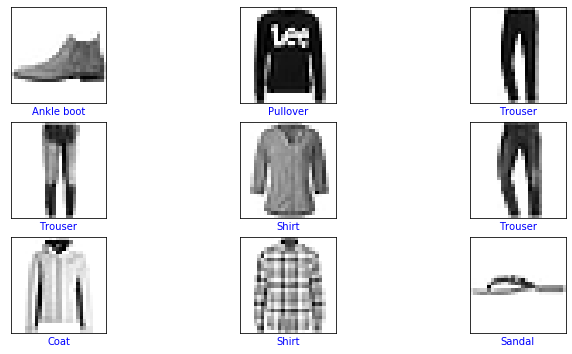

In [14]:
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.show()